In this assignment, you will analyze how the bias/variance tradeoff depends on the sample size, namely, on the number of data points in the training set. You will use the code we wrote in class and extend it to include an average over the test set datapoints.

- You will generate a dataset consisting of a independent variable $x$ and a dependent variable $y$ (targets), related by ground truth model $y=f(x)$ with 
$$
f(x)=sin(x)+sin(3x)+5cos(10x)+sin(20x)+0.5sin(40x)
$$
The idea is that the ground truth model is much more complicated than the polynomial models we will try to fit to it, which is the typical situation one faces in practice when working with experimental data.
Generate $N=10^6$ observations $x_i,y_i$ uniformly distributed along the interval $x\in[-x_{max},x_{max}]$ with $x_{max}=2$ using the following generative model
$$
y_i=f(x_i)+\epsilon_i
$$
The measurement noise is sampled from a gaussian distribution $\epsilon_i\sim {\cal N}(0,\sigma_\epsilon^2)$ with mean zero and standard deviation $\sigma_\epsilon=1$.
- Generate a test set consisting of a $N_{test}=10^5$ observations $x^{test}_i,y^{test}_i$, for $i=1,\ldots,N_{test}$, uniformly distributed in the interval $[-x_{max},x_{max}]$.
- Visualize ground truth model, training observations, and test set.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

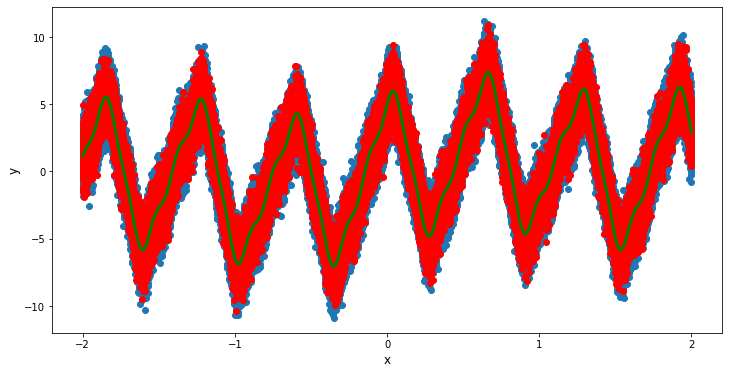

In [2]:
## Ground Truth Model

def f(x):
    y_return = np.sin(x)+np.sin(3*x)+5*np.cos(10*x)+np.sin(20*x)+0.5*np.sin(40*x)
    return y_return

# full dataset (x,y) set consists of N observations in the interval [-x_max,x_max]
# we will subsample from this to create different training sets

N=1000000
x_max=2
x=x_max*(2*np.random.rand(N)-1) # uniform distribution
# measurement noise
sigma_epsilon=1
mean_epsilon=0
# generate noise from a gaussian distribution of mean mean_epsilon and standard deviation sigma_epsilon
epsilon=mean_epsilon+sigma_epsilon*np.random.randn(N)


# full dataset set (x,y)
# target labels
y=f(x)+epsilon

# test set outside of training range:
n_test=10**(5)

x_test=x_max*(2*np.random.rand(n_test)-1)
epsilon1=sigma_epsilon*np.random.randn(n_test)
y_test=f(x_test)+epsilon1

#plot
plt.figure(figsize=(12, 6))
x_range = np.linspace(-x_max, x_max, 1000)
# ground truth model
plt.plot(x_range, f(x_range), 'g', linewidth=3.0)
# training set
plt.scatter(x, y)
# test set
plt.scatter(x_test, y_test, c='r')
#
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.xticks(np.arange(-x_max, x_max + 1))
plt.show()

- Your goal is to learn a polynomial function $\hat f(x)$ on the observation and to compare alternative models, within the class of polynomials of degree $d$: $
\hat f_d(x|w)=\sum_{i=0}^d w^{(d)}_i x^i$, where $w^{(d)}_i$ are the parameters to be learned using polynomial regression. You will compare the following metrics in two alternative models given by $d=5$ and $d=20$. 
- For each model $\hat f_d(x|w)$, you will study how inference depends on the size of the training set. Thus, you will fit each model to training sets of increasing size $N_{train}=200,500,1000,2000,5000,10000$. For each size of a training set in this range, you will perform $a=1,\ldots,n_{exp}$ experiments with $n_{exp}=100$. In each experiment, you will create a new training set $S_{train}^a=[x_i,y_i]$ by randomly subsampling $N_{train}$ of the original $N$ observations, then fit the model $\hat f_d(x|w)$ to the training set $S_{train}^a$, to learn the parameters $w^{(d)}_i(a)\equiv w^{(d)}_i(S_{train}^a)$. 


In [3]:
d_arr=[5,20]
#our class of models to fit: polynomials of degree d
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

# fits
n_exp=100

In [4]:
# train 200
n_200 = int(0.0002*N)
train_squared_error_200=np.zeros((len(d_arr),n_exp))
y_hat_test_200=np.zeros((len(d_arr),n_exp,n_test))
for r in range(n_exp):
    idx=np.random.permutation(N)[:n_200]
    x_train,y_train=x[idx],y[idx]
    for k in range(len(d_arr)):
        d=d_arr[k]
        w=np.polyfit(x_train,y_train,d)
        train_squared_error_200[k,r] = np.mean((y_train - f_hat(x_train,w))**2)
        y_hat_test_200[k,r,:]=f_hat(x_test,w)

        
### Calculations
test_squared_error_200=np.mean((y_hat_test_200-y_test)**2,1)
bias_squared_200=(np.mean(y_hat_test_200,1)-f(x_test))**2
var_y_hat_test_200=np.var(y_hat_test_200,1)

# test squared error
t_200 = np.mean((test_squared_error_200),1)

# test squared error
tr_200 = np.mean(train_squared_error_200,1)

# bias 
b_200 = np.mean(bias_squared_200,1)

# variance
v_200 = np.mean((var_y_hat_test_200),1)


In [5]:
# train 500
n_500 = int(0.0005*N)
train_squared_error_500=np.zeros((len(d_arr),n_exp))
y_hat_test_500=np.zeros((len(d_arr),n_exp,n_test))
for r in range(n_exp):
    idx=np.random.permutation(N)[:n_500]
    x_train,y_train=x[idx],y[idx]
    for k in range(len(d_arr)):
        d=d_arr[k]
        w=np.polyfit(x_train,y_train,d)
        train_squared_error_500[k,r] = np.mean((y_train - f_hat(x_train,w))**2)
        y_hat_test_500[k,r,:]=f_hat(x_test,w)
        
### Calculations
test_squared_error_500=np.mean((y_hat_test_500-y_test)**2,1)
bias_squared_500=(np.mean(y_hat_test_500,1)-f(x_test))**2
var_y_hat_test_500=np.var(y_hat_test_500,1)

# test squared error
t_500 = np.mean((test_squared_error_500),1)

# test squared error
tr_500 = np.mean(train_squared_error_500,1)

# bias 
b_500 = np.mean(bias_squared_500,1)

# variance
v_500 = np.mean((var_y_hat_test_500),1)

In [6]:
# train 1000
n_1000 = int(0.001*N)
train_squared_error_1000=np.zeros((len(d_arr),n_exp))
y_hat_test_1000=np.zeros((len(d_arr),n_exp,n_test))
for r in range(n_exp):
    idx=np.random.permutation(N)[:n_1000]
    x_train,y_train=x[idx],y[idx]
    for k in range(len(d_arr)):
        d=d_arr[k]
        w=np.polyfit(x_train,y_train,d)
        train_squared_error_1000[k,r] = np.mean((y_train - f_hat(x_train,w))**2)
        y_hat_test_1000[k,r,:]=f_hat(x_test,w)
        
### Calculations
test_squared_error_1000=np.mean((y_hat_test_1000-y_test)**2,1)
bias_squared_1000=(np.mean(y_hat_test_1000,1)-f(x_test))**2
var_y_hat_test_1000=np.var(y_hat_test_1000,1)

# test squared error
t_1000 = np.mean((test_squared_error_1000),1)

# test squared error
tr_1000 = np.mean(train_squared_error_1000,1)

# bias 
b_1000 = np.mean(bias_squared_1000,1)

# variance
v_1000 = np.mean((var_y_hat_test_1000),1)

In [7]:
# train 2000
n_2000 = int(0.002*N)
train_squared_error_2000=np.zeros((len(d_arr),n_exp))
y_hat_test_2000=np.zeros((len(d_arr),n_exp,n_test))
for r in range(n_exp):
    idx=np.random.permutation(N)[:n_2000]
    x_train,y_train=x[idx],y[idx]
    for k in range(len(d_arr)):
        d=d_arr[k]
        w=np.polyfit(x_train,y_train,d)
        train_squared_error_2000[k,r] = np.mean((y_train - f_hat(x_train,w))**2)
        y_hat_test_2000[k,r,:]=f_hat(x_test,w)
        
### Calculations
test_squared_error_2000=np.mean((y_hat_test_2000-y_test)**2,1)
bias_squared_2000=(np.mean(y_hat_test_2000,1)-f(x_test))**2
var_y_hat_test_2000=np.var(y_hat_test_2000,1)

# test squared error
t_2000 = np.mean((test_squared_error_2000),1)

# test squared error
tr_2000 = np.mean(train_squared_error_2000,1)

# bias 
b_2000 = np.mean(bias_squared_2000,1)

# variance
v_2000 = np.mean((var_y_hat_test_2000),1)


In [8]:
# train 5000
n_5000 = int(0.005*N)
train_squared_error_5000=np.zeros((len(d_arr),n_exp))
y_hat_test_5000=np.zeros((len(d_arr),n_exp,n_test))
for r in range(n_exp):
    idx=np.random.permutation(N)[:n_5000]
    x_train,y_train=x[idx],y[idx]
    for k in range(len(d_arr)):
        d=d_arr[k]
        w=np.polyfit(x_train,y_train,d)
        train_squared_error_5000[k,r] = np.mean((y_train - f_hat(x_train,w))**2)
        y_hat_test_5000[k,r,:]=f_hat(x_test,w)

### Calculations
test_squared_error_5000=np.mean((y_hat_test_5000-y_test)**2,1)
bias_squared_5000=(np.mean(y_hat_test_5000,1)-f(x_test))**2
var_y_hat_test_5000=np.var(y_hat_test_5000,1)

# test squared error
t_5000 = np.mean((test_squared_error_5000),1)

# test squared error
tr_5000 = np.mean(train_squared_error_5000,1)

# bias 
b_5000 = np.mean(bias_squared_5000,1)

# variance
v_5000 = np.mean((var_y_hat_test_5000),1)

In [9]:
# train 10000
n_10000 = int(0.01*N)
train_squared_error_10000=np.zeros((len(d_arr),n_exp))
y_hat_test_10000=np.zeros((len(d_arr),n_exp,n_test))
for r in range(n_exp):
    idx=np.random.permutation(N)[:n_10000]
    x_train,y_train=x[idx],y[idx]
    for k in range(len(d_arr)):
        d=d_arr[k]
        w=np.polyfit(x_train,y_train,d)
        train_squared_error_10000[k,r] = np.mean((y_train - f_hat(x_train,w))**2)
        y_hat_test_10000[k,r,:]=f_hat(x_test,w)
        
### Calculations
test_squared_error_10000=np.mean((y_hat_test_10000-y_test)**2,1)
bias_squared_10000=(np.mean(y_hat_test_10000,1)-f(x_test))**2
var_y_hat_test_10000=np.var(y_hat_test_10000,1)

# test squared error
t_10000 = np.mean((test_squared_error_10000),1)

# test squared error
tr_10000 = np.mean(train_squared_error_10000,1)

# bias 
b_10000 = np.mean(bias_squared_10000,1)

# variance
v_10000 = np.mean((var_y_hat_test_10000),1)

- For each experiment $a$ with learned parameters $w^{(d)}_i(a)$, you will then make a prediction for all points in the test set $y^{test}_i=\hat f(x^{test}_i|w^{(d)}_i(a)$). Crucially, the learned parameters $w^{(d)}_i(a)$ and thus the prediction $y^{test}_i$ will be different in the different experiments: they are functions of the training set  $S_{train}^a$.
- For each experiment $a$, estimate the average squared training error 
$$err_{train}(d,a)={1\over N_{train}}\sum_{i\in N_{train}}[\hat f_d(x_i|w^{(d)}(a))-y_i]^2 \ ,$$
the average squared test error 
$$err_{test}(d,a)={1\over N_{test}}\sum_{i\in N_{test}}[\hat f_d(x^{test}_i|w^{(d)}(a))-y^{test}_i]^2 \ ,$$
and the squared irreducible error $err_{\epsilon}={1\over N_{test}}\sum_{i\in N_{test}}\sigma_i^2$, and also the average bias squared and the variance of the predictions in the test set.


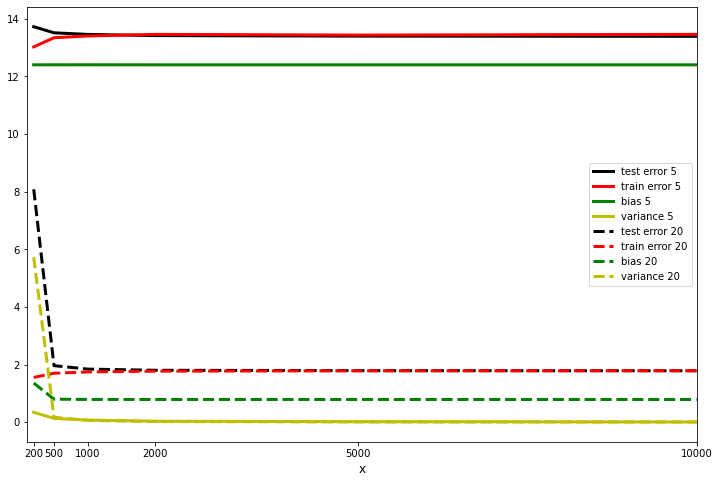

In [10]:
## Just looking at standard deviation of bias and variance

x = [200,500,1000,2000,5000,10000]

# d=5
test_squared_5 = [t_200[:1], t_500[:1], t_1000[:1], t_2000[:1], t_5000[:1], t_10000[:1]]
tr_squared_5 = [tr_200[:1], tr_500[:1], tr_1000[:1], tr_2000[:1], tr_5000[:1], tr_10000[:1]]
bias_5 = [b_200[:1], b_500[:1], b_1000[:1], b_2000[:1], b_5000[:1], b_10000[:1]]
variance_5 = [v_200[:1], v_500[:1], v_1000[:1], v_2000[:1], v_5000[:1], v_10000[:1]]

#d=20
test_squared_20 = [t_200[1:], t_500[1:], t_1000[1:], t_2000[1:], t_5000[1:], t_10000[1:]]
tr_squared_20 = [tr_200[1:], tr_500[1:], tr_1000[1:], tr_2000[1:], tr_5000[1:], tr_10000[1:]]
bias_20 = [b_200[1:], b_500[1:], b_1000[1:], b_2000[1:], b_5000[1:], b_10000[1:]]
variance_20 = [v_200[1:], v_500[1:], v_1000[1:], v_2000[1:], v_5000[1:], v_10000[1:]]


plt.figure(figsize=(12,8))
#d=5
plt.plot(x,test_squared_5,'k',linewidth=3.0)
plt.plot(x,tr_squared_5,'r',linewidth=3.0)
plt.plot(x,bias_5,'g',linewidth=3.0)
plt.plot(x,variance_5,'y',linewidth=3.0)


#d=20
plt.plot(x,test_squared_20,'k--',linewidth=3.0)
plt.plot(x,tr_squared_20,'r--',linewidth=3.0)
plt.plot(x,bias_20,'g--',linewidth=3.0)
plt.plot(x,variance_20,'y--',linewidth=3.0)

plt.xlim([100,10000])
plt.xticks(x)
plt.xlabel('x',size=12)
plt.legend(['test error 5',"train error 5",'bias 5','variance 5','test error 20',"train error 20",'bias 20','variance 20'])
plt.show()

- For each size $N_{train}=200,500,1000,2000,5000$ of the training set, calculate the average of these quantities $<\ldots>_{n_{exp}}$ across the experiments. Then plot $<err_{train}>_{n_{exp}}$, $<err_{test}>_{n_{exp}}$, $<bias^2>_{n_{exp}}$, and $<var>_{n_{exp}}$ as functions of the size of the training set. Explain how these quantities change and, in particular, verify that training and test errors converge to the $bias^2+err_{\epsilon}$, and that the bias/variance tradeoff theorem is satisfied for each size of the training set.
- Explain the qualitative difference between the low degree and the high degree polynomial models. For which model do training and test errors converge faster?

### Movement of our Quantities
When we only take 200 and then 500 training points, we see movement of most all of the variables. However, once we hit 1000 training points, it seems that all of our averages converge to a set number. We see that the bias, training error, and test error of our $d=5$ model are quite high relative to $d=20$. Since we are trying to fit a complex function and our test datapoints are in the same bounds as the training variables, this finding makes sense. The more complex model ($d=20$) has more weights that it can alter to better fit our training data relative to the less complex model ($d=5$).

The training and test error appear to converge faster in the high degree polynomial model relative to the low degree model.

### Training and Test Error Converge
For both $d$ values, the train and test error converge at approximately 1 + their respective $bias^2$. Since we set our irreducible error at 1 we can claim that,

$ \lim_{x\to\infty} \text{Test Error} = \lim_{x\to\infty} \text{Training Error} = bias^2 +1 = bias^2+err_{\epsilon}  $

### Bias / Variance Tradeoff Theorem

The bias/variance tradeoff theorem is satisfied for each size of the training set. Across all the sizes, we see a bias of around 12.5 for the less complex model and a bias of around 1 for the more complex model.

According to the bias/variance tradeoff theorem we are also supposed to find that the variance in the more complex model is higher than the less complex model. Although we see that trend in the 200 and 500 training points functions, the trend does not quite hold up. The plot below shows the variance of the two models. This pattern does not hold up because our training points fell in the same domain as our test points. If our test points were outside the domain of the training set, we would see the variance be higher in the more complex model. This pattern would become more and more evident as we increased the distance of the test set from the training set.





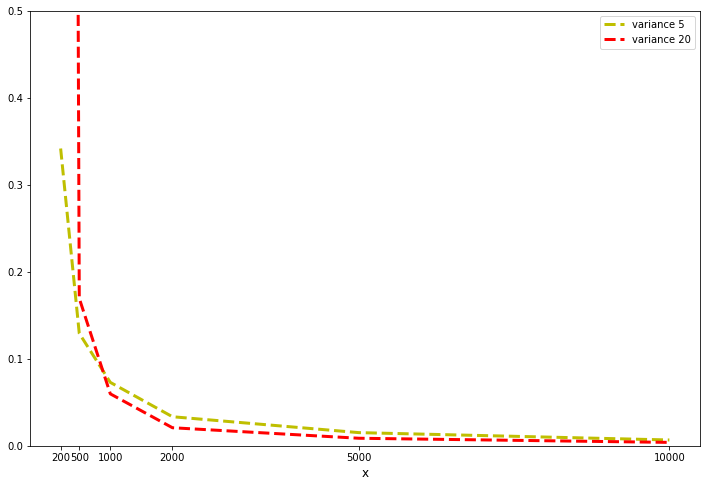

In [12]:
plt.figure(figsize=(12,8))
#d=5
plt.plot(x,variance_5,'y--',linewidth=3.0)

#d=20
plt.plot(x,variance_20,'r--',linewidth=3.0)

plt.ylim([0,0.5])
plt.xticks(x)
plt.xlabel('x',size=12)
plt.legend(['variance 5','variance 20'])
plt.show()